# Практическая работа по ОММ 2
## Автор: Талавринова Софья
# Вариант 64
### Преподаватель: Митина Ирина Владимировна
## Постановка задачи:

Используя метод переменных направлений, решите краевую задачу:
    \begin{equation*}
        \begin{cases}
             \frac{\partial u}{\partial t}=\Delta u + e^{-t}\cdot cos(x)\cdot cos(y)
             \\
             \left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.\frac{\partial u}{\partial x}\right|_{x=\pi}=0
             \\
             \left.\frac{\partial u}{\partial y}\right|_{y=0}=\left.\frac{\partial u}{\partial y}\right|_{y=\pi}=0
             \\
             \left.u\right|_{t=0}=cos(x)\cdot cos(y)
        \end{cases}
    \end{equation*}

## Аналитическое решение
Для начала требуется найти аналитическое решение данной задачи.Из постановки задачи видно, что начальное условие и неоднородность ортогональны.
1) Поставим задачу Штурма-Лиувилля в прямоугольной области
Решение будем искать в виде $ u(x,y,t)=\sum\limits_m^{\infty}T_{nm}(t)\sum\limits_n^{\infty}V_{nm}(x,y) $. 
2) Используя деление переменных получим явный вид функций $T_{nm}(t), V_{nm}(x,y) $, который определяется из решений соответствующей задачи Штурма-Лиувилля и задачи Коши:
\begin{equation*}
\begin{cases}
\Delta V +\lambda V=0 \qquad 0<x<\pi,0<y<\pi
\\
\left.\frac{\partial V}{\partial x}\right|_{x=0}=\left.\frac{\partial V}{\partial x}\right|_{x=\pi}=0
\\
\left.\frac{\partial V}{\partial y}\right|_{y=0}=\left.\frac{\partial V}{\partial y}\right|_{y=\pi}=0
\end{cases}
\qquad
\begin{cases}
\frac{dT}{dt}+\lambda T=f(t)
\\
T(0)=cos(x)\cdot cos(y)
\end{cases}
\end{equation*}


Решением краевой задачи 
\begin{cases}
\Delta X +\mu X=0 \qquad 0<x<\pi
\\
\left.\frac{\partial X}{\partial x}\right|_{x=0}=\left.\frac{\partial X}{\partial x}\right|_{x=\pi}=0
\end{cases}

\begin{cases}
\Delta Y +\nu Y=0 \qquad 0<y<\pi
\\
\left.\frac{\partial Y}{\partial y}\right|_{y=0}=\left.\frac{\partial Y}{\partial y}\right|_{y=\pi}=0
\end{cases}

Будет
\begin{cases}
X_n=cos(nx) \qquad \mu=n^2 \qquad n=0,1..
\\
Y_m=cos(my) \qquad \nu=m^2 \qquad m=0,1..
\end{cases}

\begin{cases}
\frac{dT}{dt}+\lambda_{nm} T=f(t)
\\
T(0)=cos(x)\cdot cos(y)
\end{cases}
где $ \lambda_{nm} = \mu + \nu =n^2 + m^2 $

Проведем решение задачи Коши

$$ f_{nm}=\frac{1}{||V_{nm}||^2}\iint F(x,y,t)V_{nm}(x,y)dx dy =I $$

$$ \phi_{nm}=\frac{1}{||V_{nm}||^2}\iint \Phi(x,y,t)V_{nm}(x,y)dx dy =J $$

$$ I = \frac{4 \cdot e^{-t}}{\pi^2(1+\delta_{n0})(1+\delta_{m0})}\int_0^\pi cos(x)cos(nx)dx \int_0^\pi cos(y)cos(my)dy= e^{-t} $$

$$ f_{11}=e^{-t},\qquad  f_{nm}=0, \qquad n,m\neq0 $$

$$ J = \frac{4}{\pi^2(1+\delta_{n0})(1+\delta_{m0})}\int_0^\pi cos(x)cos(nx)dx \int_0^\pi cos(y)cos(my)dy= 1 $$

$$ \qquad \phi_{11}=1, \qquad \phi_{nm}=0,\qquad  n,m\neq0 $$

В таком случае решение задачи Коши 

$ T_{nm}=\phi_{nm}\cdot e^{-\lambda_{nm}t} + \int_0^t e^{-\lambda (t-\tau)} \cdot f_{nm}(\tau)d\tau $

$ u(x,y,t)=\sum\limits_m^{\infty}\sum\limits_n^{\infty}T_{nm}(t)\cdot V_{nm}(x,y) $. Как мы выяснили все коэффициенты не равные n=1 и m=1 равны нулю, а значит $ u(x,y,t) =T_{11}(t) \cdot V_{11}(x,y) $

Полное аналитическое решение $ u(x,y,t) =e^{-t}\cdot cos(x) \cdot cos(y) $

## Конечно разностная аппроксимация

## Построение разностной схемы
Введем одномерные разностные временную и пространственные сетки в области 
$\Omega = G\otimes[0,T]$:

\begin{equation}
        G: \{(x, y)| x \in (0; 1), y \in (0; 1)\}
       \\
     \omega_{h} : \{(x_i,y_j)| x_i = ih_x, \ i = \overline{0,N_x}, \ N_xh_x = 1; \\
     y_j = jh_y, \ j = \overline{0,N_y}, \ N_yh_y = 1\} \\
     \omega_{\tau} : t_k = k\tau, \ k = \overline{0,N_{\tau}}, \ \tau N_{\tau} = T
\end{equation}
\begin{equation}
    \omega_{h\tau} = \omega_{h}\otimes \omega_{\tau}
\end{equation}
где $N_{\tau}, N_x, N_y$ - число узлов сетки; $h_x, h_y, h_{\tau}$ - шаги по осям x, y, t соответственно. На введенной сетке будем рассматривать сеточные функции $U^k_{ij} = U(x_i, y_j, t^k)$

Введем разностную аппроксимацию оператора Лапласа:
\begin{equation}
    \Lambda U^k_{ij} = \Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}
    \\
    \Lambda_x U^k_{ij} = \dfrac{U^k_{(i+1)j} - 2 U^k_{ij} + U^k_{(i-1)j}}{h_x^2}
    \\
    \Lambda_y U^k_{ij} = \dfrac{U^k_{i(j+1)} - 2 U^k_{ij} + U^k_{i(j-1)}}{h_y^2}
\end{equation}
Для граничных условий Неймана введем аппроксимацию односторонней
разностной производной:
$$
\begin{cases}
        \dfrac{U^k_{i1} - U^k_{i0}}{h_y} = 0, \ k = \overline{0,N_{\tau}}\\
        \dfrac{U^k_{iN_{y}} - U^k_{i(N_{y}-1)}}{h_y} = 0, \ i = \overline{0,N_x} 
\end{cases}
$$

Теперь аппроксимируем уравнение теплопроводности из задачи следующим разностным уравнением:
\begin{align}
    &\ \dfrac{U^{k+1}_{ij} - U^k_{ij}}{\tau} = \Lambda (\delta U^{k+1}_{ij} + (1 - \delta)U^k_{ij}) + f^k_{ij}
    \\
    &\ f^k_{ij} = cos(\pi y_j)e^{-(t^k)}, \ i = \overline{0,N_x-1}, \  j = \overline{0,N_y-1}, \ k = \overline{0,N_{\tau}-1}
\end{align}

При $\delta = 0$ мы получаем явную разностную схему, и решение во внутренних точках вычисляется по формуле:
\begin{equation}
    U^{k+1}_{ij} = U^k_{ij} + \tau (\Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}) + \tau f^k_{ij}
\end{equation}


При $\delta = 1$ мы получаем неявную разностную схему. Для определения $U^{k+1}_{ij}$ мы получаем на каждом шаге линейную систему: 
\begin{equation}
    U^{k+1}_{ij} - \tau (\Lambda_x U^{k+1}_{ij} + \Lambda_y U^{k+1}{ij}) = U^k_{ij} + \tau f^k_{ij}
\end{equation}

## Метод прогонки

Рассмотрим первый полуслой и будем решать задачу методом прогонки. Пусть имеется уравнение с начально-граничными условиями:
\begin{align}
    \begin{cases}
            A_i y_{i-1} - B_i y_i + C_i y_{i+1} = F_i, \ |B_i|=|A_i| + |C_i| \label{eq:p2}\\ 
            y_0 = \alpha_{1} y_{1} + \beta_{1} , \ i = \overline{0, N} \\
            y_N = \alpha_2 y_{N-1} + \beta_2
    \end{cases}     
\end{align}

Пусть значение искомой функции в двух соседних точках связаны следующим линейным соотношением: $y_{i-1} = d_iy_i + \delta_i$

Тогда:
\begin{align}
    &\ A_i(d_i y_i + \delta_i) - B_i y_i + C_i y_{i+1} = F_i \\
    &\ (A_id_i - B_i)y_i = -C_i y_{i+1} + F_i - \delta_i A_i \\
    &\ y_{i+1}\left[ (A_id_i - B_i)d_{i+1} + C_i \right] = F_i - \delta_i A_i - (A_id_i - B_i)\delta_{i+1}
\end{align}

Для того, чтобы это соотношение было верно для любых $y_{i+1}$ нужно, чтобы выражение в квадратных скобках и правая часть было равны нулю. Приравнивая их нулю, получаем рекуррентные формулы для определения прогоночных коэффициентов:
\begin{equation}
    d_{i+1} = \dfrac{C_i}{B_i - A_i d_i}, \;\;\;\;\;\; \delta_{i+1} = \dfrac{F_i - \delta_i A_i}{A_id_i - B_i}
\end{equation}

Сравнивая граничные условия задачи с выражением $y_{i-1} = d_iy_i + \delta_i$, находим $d_1 = \alpha_1$, $\delta_1 = \beta_1$

Используя эти значения $d_1$ и $\delta_1$, совершим прогонку в направлении возрастания индекса, последовательно определяя значения коэффициентов $d_i$ и $\delta_i$ для $i = \overline{1, N}$.

Также нетрудно получить рекуррентные соотношения для $y_{N-1}$ и $y_N$: $y_{N-1} = d_N y_N + \delta_N$ и $y_N = \alpha_2 y_ {N-1} + \beta_2$. Их этих соотношений получаем: 
\begin{equation}
    y_{N-1} = d_n y_N + \delta_N = d_N(\alpha_2y_{N-1} + \beta_2) + \delta_N  \;\;\;\; \implies \;\;\;\; y_N = \dfrac{\alpha_2 \delta_N + \beta_2}{1 - d_N \alpha_2} \label{eq:p3}     
\end{equation}

При $d_1 = \alpha_1$ и условиях, наложенных при постановке задачи на $B_i, A_i, C_i, \alpha_{1, 2}$ получаем, что знаменатель в \eqref{eq:p3} положительный. Следовательно значение $y_N$ определено.

Используя найденное значение $y_N$, делаем обратную прогонку в сторону уменьшающихся значений индекса, поледовательно определяя значения $y_i$.

\subsection{Достаточные условия применения метода прогонки}

Выпишем уравнения и граничные условия из систем, для которых мы собираемся применить метод прогонки:
\begin{align}
        \begin{cases}
            \dfrac{0.5\tau}{h_x^2}U^{k + \frac{1}{2}}_{(i+1)j} - (1 + \dfrac{\tau}{h_x^2})U^{k + \frac{1}{2}}_{ij} + \dfrac{0.5\tau}{h_x^2}U^{k + \frac{1}{2}}_{(i-1)j} = - F^{k + \frac{1}{2}}_{ij} \\
            \dfrac{U^k_{1j} - U^k_{0j}}{h_x} = 0 \\
            \dfrac{U^k_{N_{x}j} - U^k_{(N_{x}-1)j}}{h_x} = 0 
        \end{cases}
\end{align}
\begin{align}
        \begin{cases}
            \dfrac{0.5\tau}{h_y^2}U^{k+1}_{i(j+1)} - (1 + \dfrac{\tau}{h_y^2})U^{k+1}_{ij} + \dfrac{0.5\tau}{h_y^2}U^{k+1}_{i(j-1)} = - \hat{F}^{k+1}_{ij} \\
            \dfrac{U^k_{i1} - U^k_{i0}}{h_y} = 0 \\
            \dfrac{U^k_{iN_{y}} - U^k_{i(N_{y}-1)}}{h_y} = 0 
        \end{cases}
\end{align}

Сделаем замену индексов: $i\equiv n, j\equiv m$. Для удобства опустим неизменяющиеся индексы. Сделаем замену: 
\begin{align}
    A_n = C_n = \dfrac{0.5\tau}{h_x^2},\;\;\;\;\; B_n = (1 + \dfrac{\tau}{h_x^2}), \;\;\;\;\; F_n = -F^{k + \frac{1}{2}}_{ij} \\ 
    A_m = C_m = \dfrac{0.5\tau}{h_y^2},\;\;\;\;\; B_m = (1 + \dfrac{\tau}{h_y^2}), \;\;\;\;\; F_m = -F^{k + 1}_{ij} \\ \label{eq:p4}
\end{align}

Перепишем исходные системы в виде:
\begin{align}
    \begin{cases}
            A_n y_{n-1} - B_n y_n + C_n y_{n+1} = F_n \\
            y_1 = y_0 \\
            y_{N_x} = y_{N_x-1}
    \end{cases}
    \begin{cases}
            A_m y_{m-1} - B_m y_m + C_m y_{m+1} = F_m \\
            y_1 = y_0 \\
            y_{N_y} = y_{N_y-1}            
    \end{cases}
\end{align}

Согласно достаточному условию применения метода прогонки, достаточно, чтобы выполнялись следующие условия:
\begin{equation}
    |B_i|\geq|A_i| + |C_i| , \;\;\; \alpha_{1,2} \in [0, 1], \;\;\;\; i = \overline{1, N}
\end{equation}

Видно, что выполняется условие для обоих систем. Таким образом, для нашей разностной  схемы, которая применяется для численного решения задачи, выполнено достаточное условие применимости метода прогонки. 

## Код программы
Импортируем необходимые библиотеки

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

Создаем сетку по $ x,y,t$, где $0<x<\pi $, $0<y<\pi$ и $ t>0 $

In [231]:
Nx, Ny, M = 100, 100, 100 # количество шагов
X1, X2 = 0, np.pi # граничные условия
Y1, Y2 = 0, np.pi
T1, T2 = 0, 1.2   # приблизительное время затухания

x = np.linspace(X1,X2,Nx)
y = np.linspace(Y1,Y2,Ny) 
t = np.linspace(T1,T2,M)

h_x=x[1]-x[0]
h_y=y[1]-y[0]
tau=t[1]-t[0]

gamma_x = tau / (h_x**2)
gamma_y = tau / (h_y**2)

u=np.zeros((Nx,Ny,M*2+1))

#начальное условие
for i in range(0,Nx):              
    for j in range(0,Ny):
        u[i,j,0]=np.cos(x[i])*np.cos(y[j])

Определим функцию прогонки по оси x

In [232]:
def F_1(i1,i2,j):
    return 0.5 * gamma_y*(u[i1,i2-1,j-1]+u[i1,i2+1,j-1])+(1-gamma_y)*u[i1,i2,j-1]+0.5*tau*np.exp(-tau*(j+1)/2)*np.cos(x[i1])*np.cos(y[i2])
def progonka_x(i2,j):  
    d=np.zeros(Nx)             
    sigma = np.zeros(Nx)
    d[1] = 1           #условие Неймана - 1, условие Дирихле - 0
    sigma[1] = 0

    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x

    for m in range (1,Nx-1):
        Fm=F_1(m,i2,j)
        d[m+1] = C / (B - A * d[m])  
        sigma[m+1] = ((-1)*Fm - A * sigma[m]) / (A * d[m] - B)
    
        u[Nx-1,i2,j]= sigma[-1]/(1-d[-1])            #условие Дирихле
    for m in range(Nx-1,0,-1):                  
        u[m-1,i2,j]=d[m] * u[m,i2,j] + sigma[m]

Определим функцию прогонки по оси y

In [233]:
def F_2(i1,i2,j):
    return 0.5 * gamma_x*(u[i1-1,i2,j-1]+u[i1+1,i2,j-1])+(1-gamma_x)*u[i1,i2,j-1]+0.5*tau*np.exp(-tau*(j-1)/2)*np.cos(x[i1])*np.cos(y[i2])
def progonka_y(i1,j):
    d=np.zeros(Ny)             
    sigma = np.zeros(Ny)
    d[1] = 1           #условие Неймана - 1, условие Дирихле - 0
    sigma[1] = 0
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y

    for m in range (1,Ny-1):
        Fm=-F_2(i1,m,j)
        d[m+1] = C / (B - A * d[m])  
        sigma[m+1] = (Fm - A * sigma[m]) / (A * d[m] - B)
    u[i1,Ny-1,j]= sigma[-1]/(1-d[-1])
    for m in range (Ny-1,0,-1):
        u[i1,m-1,j]=d[m] * u[i1,m,j] + sigma[m]

Выполним прогонку по x, чтобы перейти на слой j+1/2, потом с помощью прогонки по оси y перейдем на слой j+1. Из-за этого нам требуется увеличенный в 2 раза размер массива времени.

In [234]:
for j in tqdm.notebook.tqdm(range(1,2*M,2)):
    for i2 in range(1,Ny-1):
        progonka_x(i2,j)
    for i1 in range(1,Nx-1):
        progonka_y(i1,j+1)

Таким образом мы получили численное решение задачи методом переменных направлений. 
Сравним его теперь с аналитическим решением.
## Ввод аналитического решения

In [235]:
z=np.zeros((Nx,Ny,M*2+1))

for i in range(0,Nx):              
    for j in range(0,Ny):
        for it in range(0,M):
            z[i,j,it]=np.cos(x[i])*np.cos(y[j])*np.exp(-it*tau)

<IPython.core.display.Javascript object>


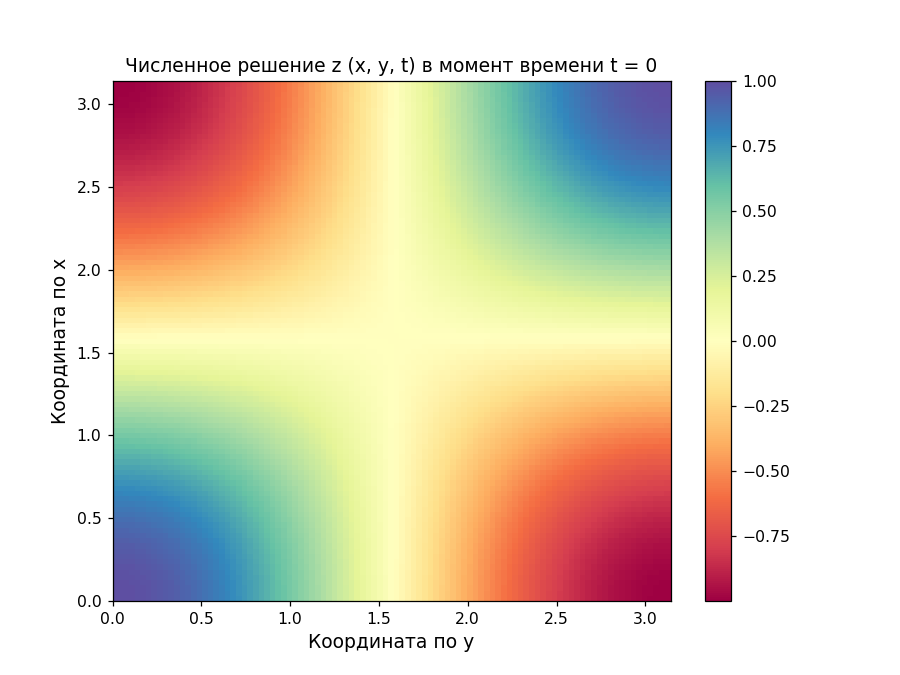

Text(0.5, 1.0, 'Численное решение z (x, y, t) в момент времени t = 0')

In [236]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,z[:,:,0],cmap='Spectral')
plt.colorbar()
plt.ylabel('Координата по х', fontsize =12)
plt.xlabel('Координата по y', fontsize =12)
plt.title('Численное решение z (x, y, t) в момент времени t = '+str(0))

Визуализируем наше решение. Для начала выведем численное и аналитическое решение рядом в начальный момент времени и в динамике в разные моменты времени, потом посмотрим на их разность, чтобы удостовериться, что значения очень мало отличаются друг от друга.

## Численное решение

<IPython.core.display.Javascript object>


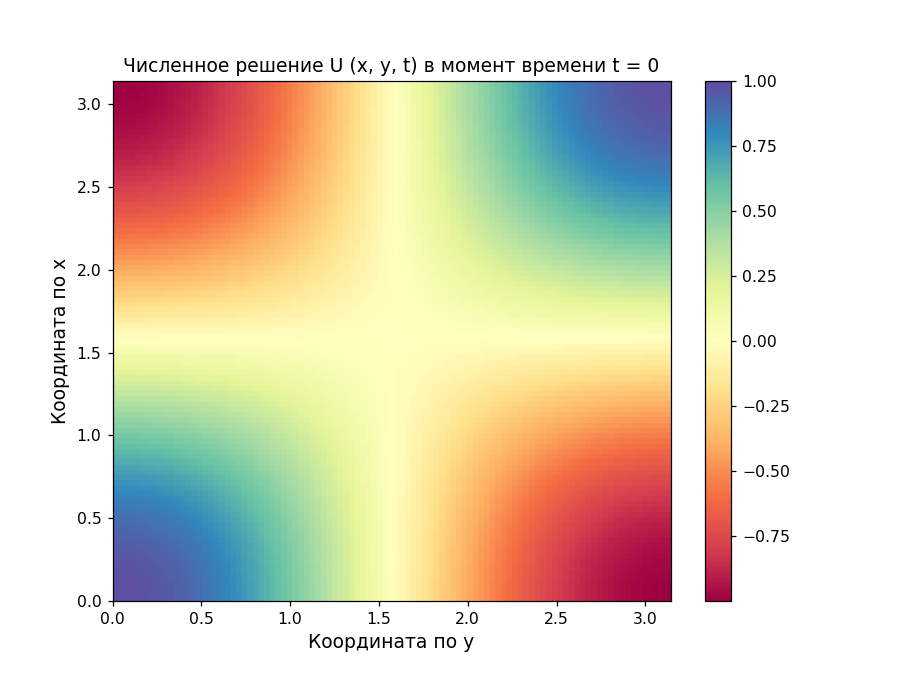

Text(0.5, 1.0, 'Численное решение U (x, y, t) в момент времени t = 0')

In [237]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,0],cmap='Spectral')
plt.colorbar()
plt.ylabel('Координата по х', fontsize =12)
plt.xlabel('Координата по y', fontsize =12)
plt.title('Численное решение U (x, y, t) в момент времени t = '+str(0))

<IPython.core.display.Javascript object>


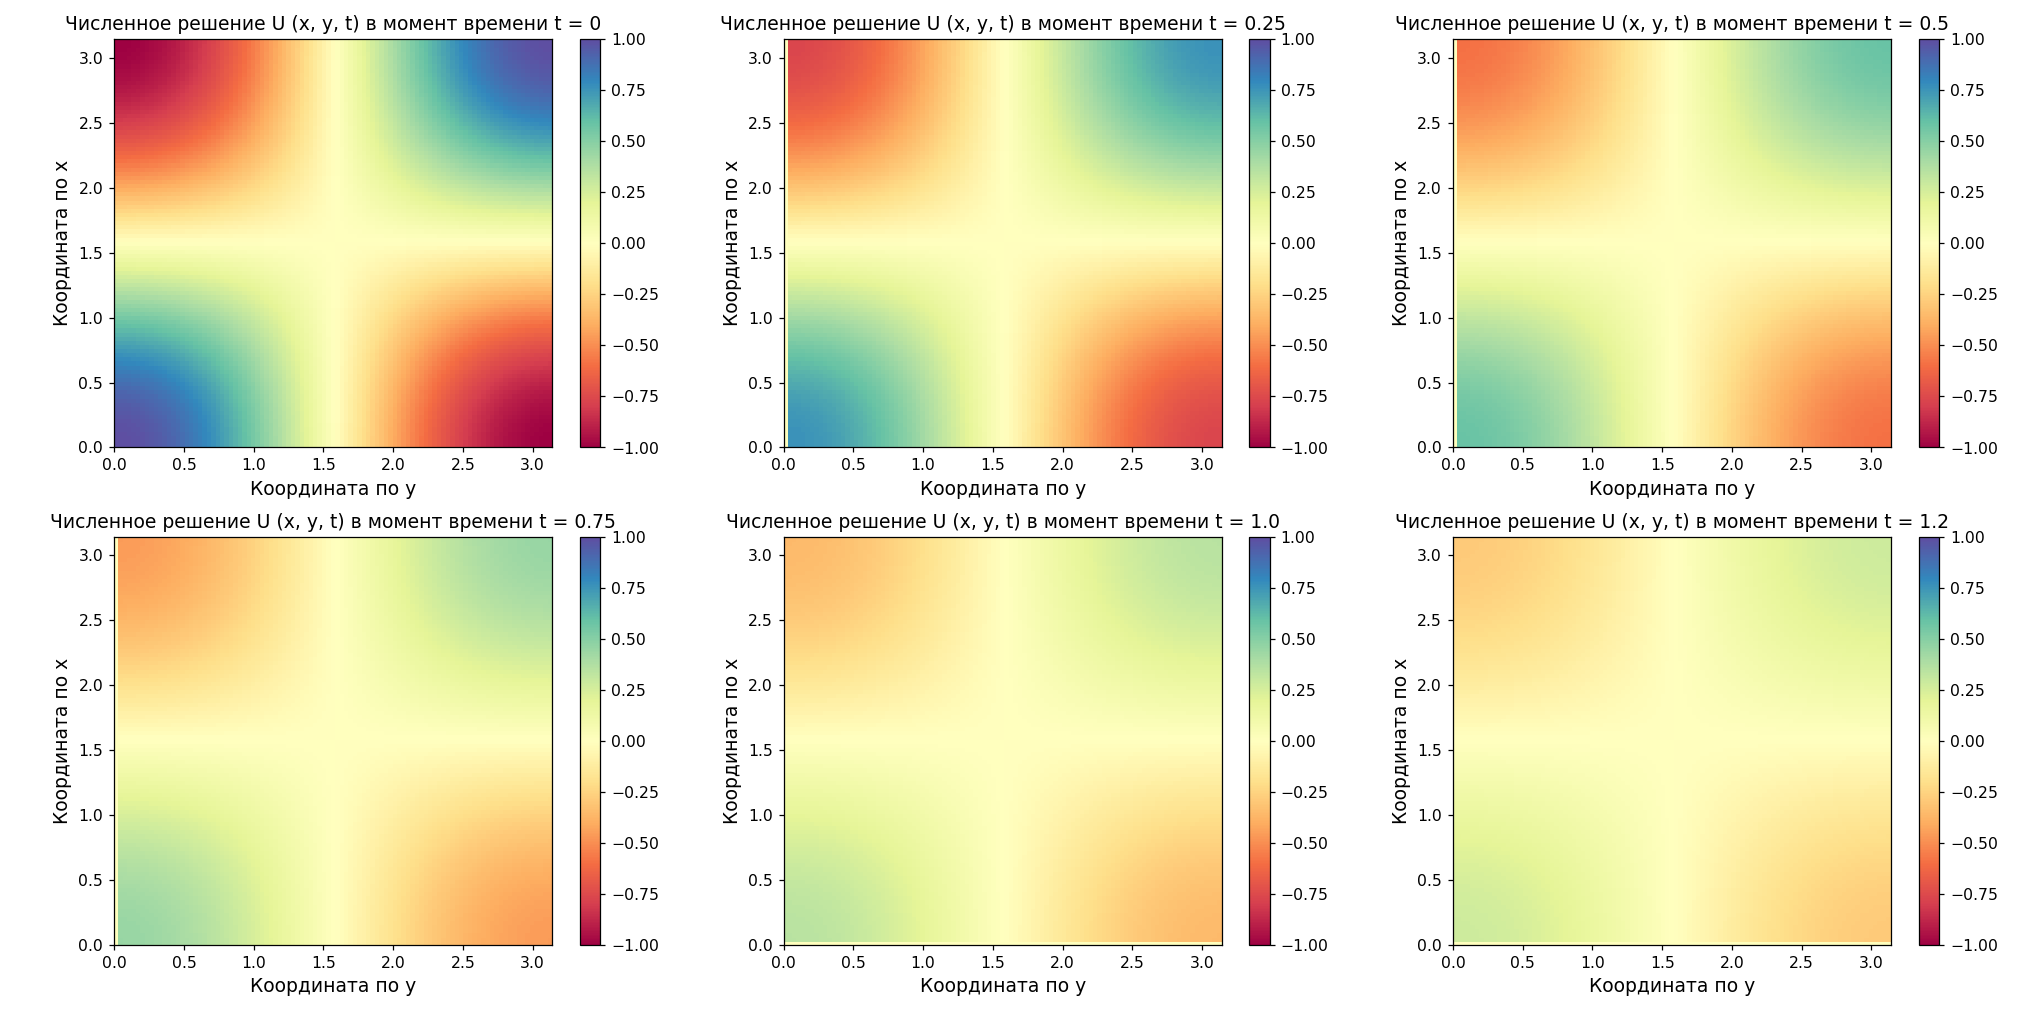

<IPython.core.display.Javascript object>


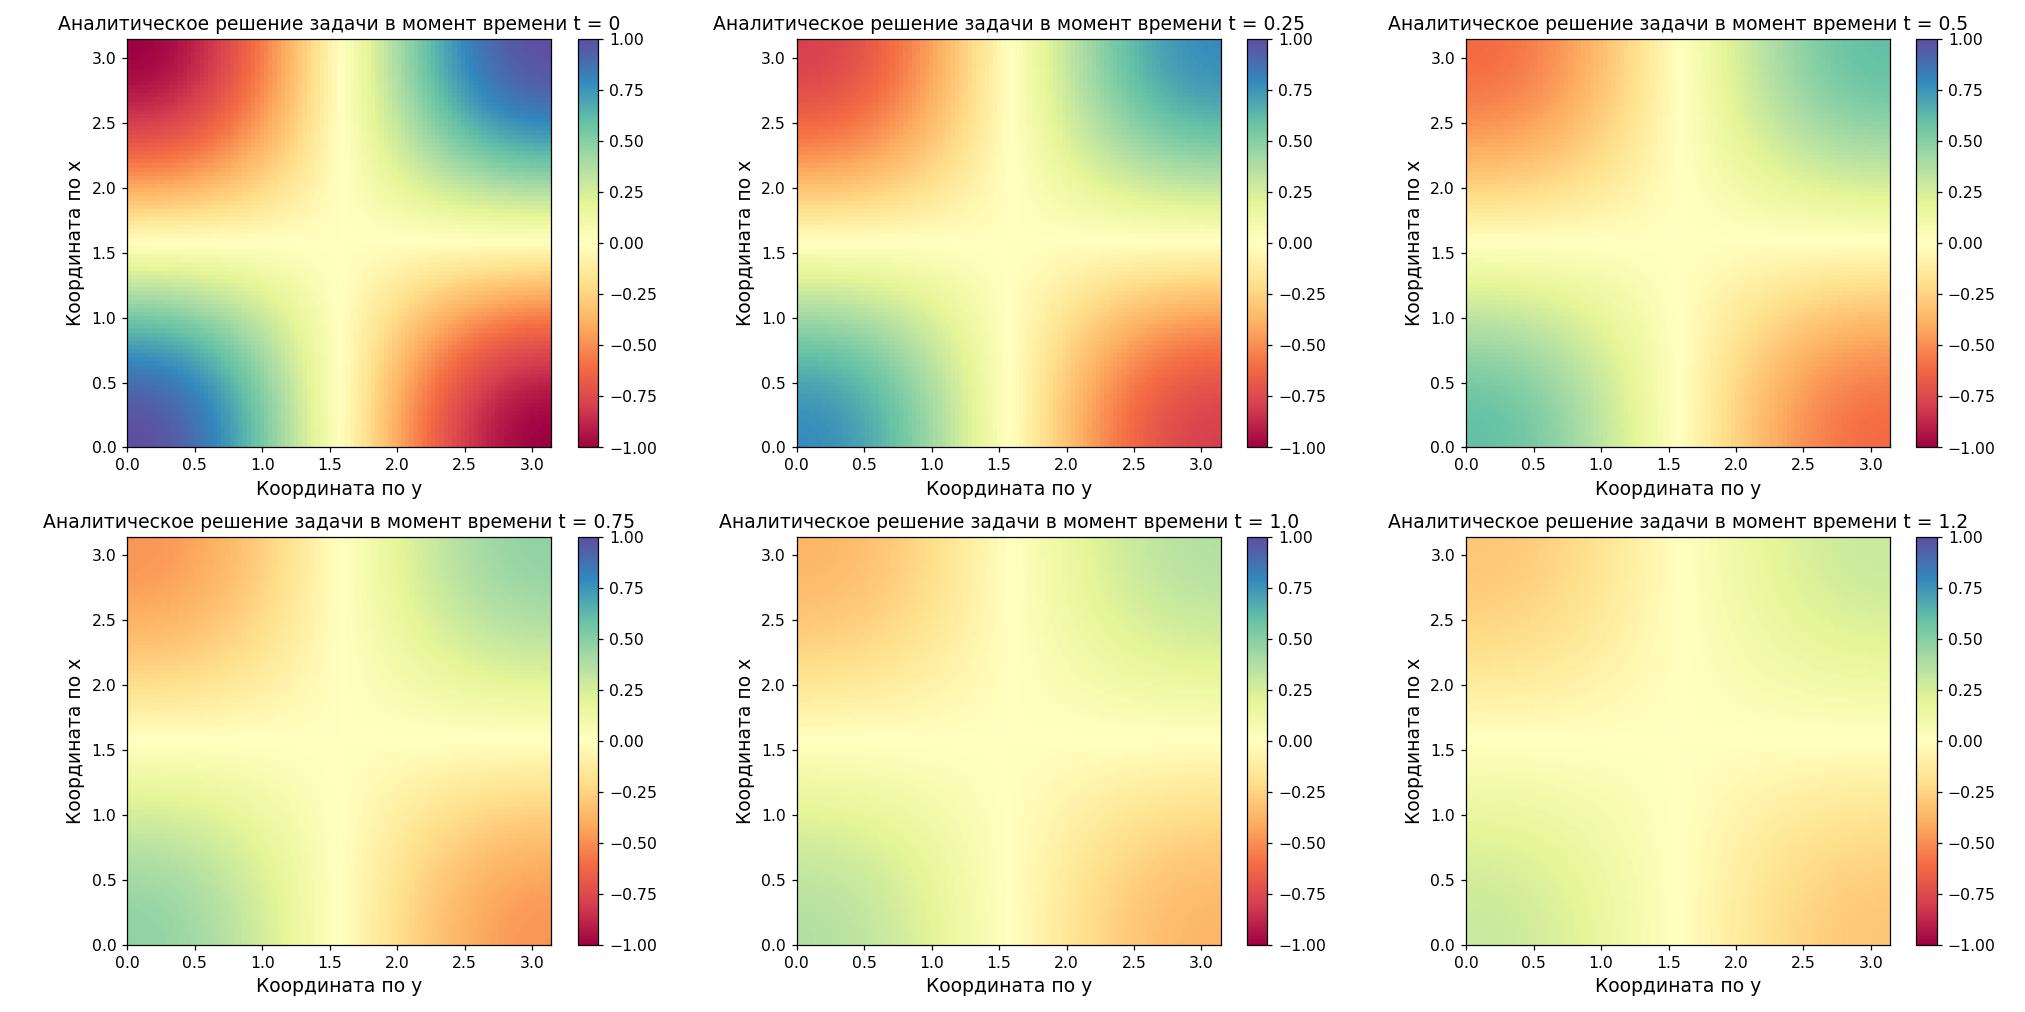

In [238]:
times=[0,0.25,0.5,0.75,1.,1.2]
fig = plt.figure(figsize = (18,9))
for i in range(len(times)):
    plt.subplot(2,3,i+1)
    r = int(times[i]/T2*(2*M))
    plt.pcolormesh(y,x,u[:,:,r],cmap='Spectral',vmin=-1,vmax=1)
    plt.colorbar()
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Численное решение U (x, y, t) в момент времени t = '+str(times[i]),fontsize=12)
plt.tight_layout()

fig = plt.figure(figsize = (18,9))
for i in range(len(times)):
    plt.subplot(2,3,i+1)
    r = int(times[i]/T2*(M-1))
    plt.pcolormesh(y,x,z[:,:,r],cmap='Spectral',vmin=-1,vmax=1)
    plt.colorbar()
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Аналитическое решение задачи в момент времени t = '+str(times[i]),fontsize=12)
plt.tight_layout()

Выведем отдельно график зависимости невязки от времени:

<IPython.core.display.Javascript object>


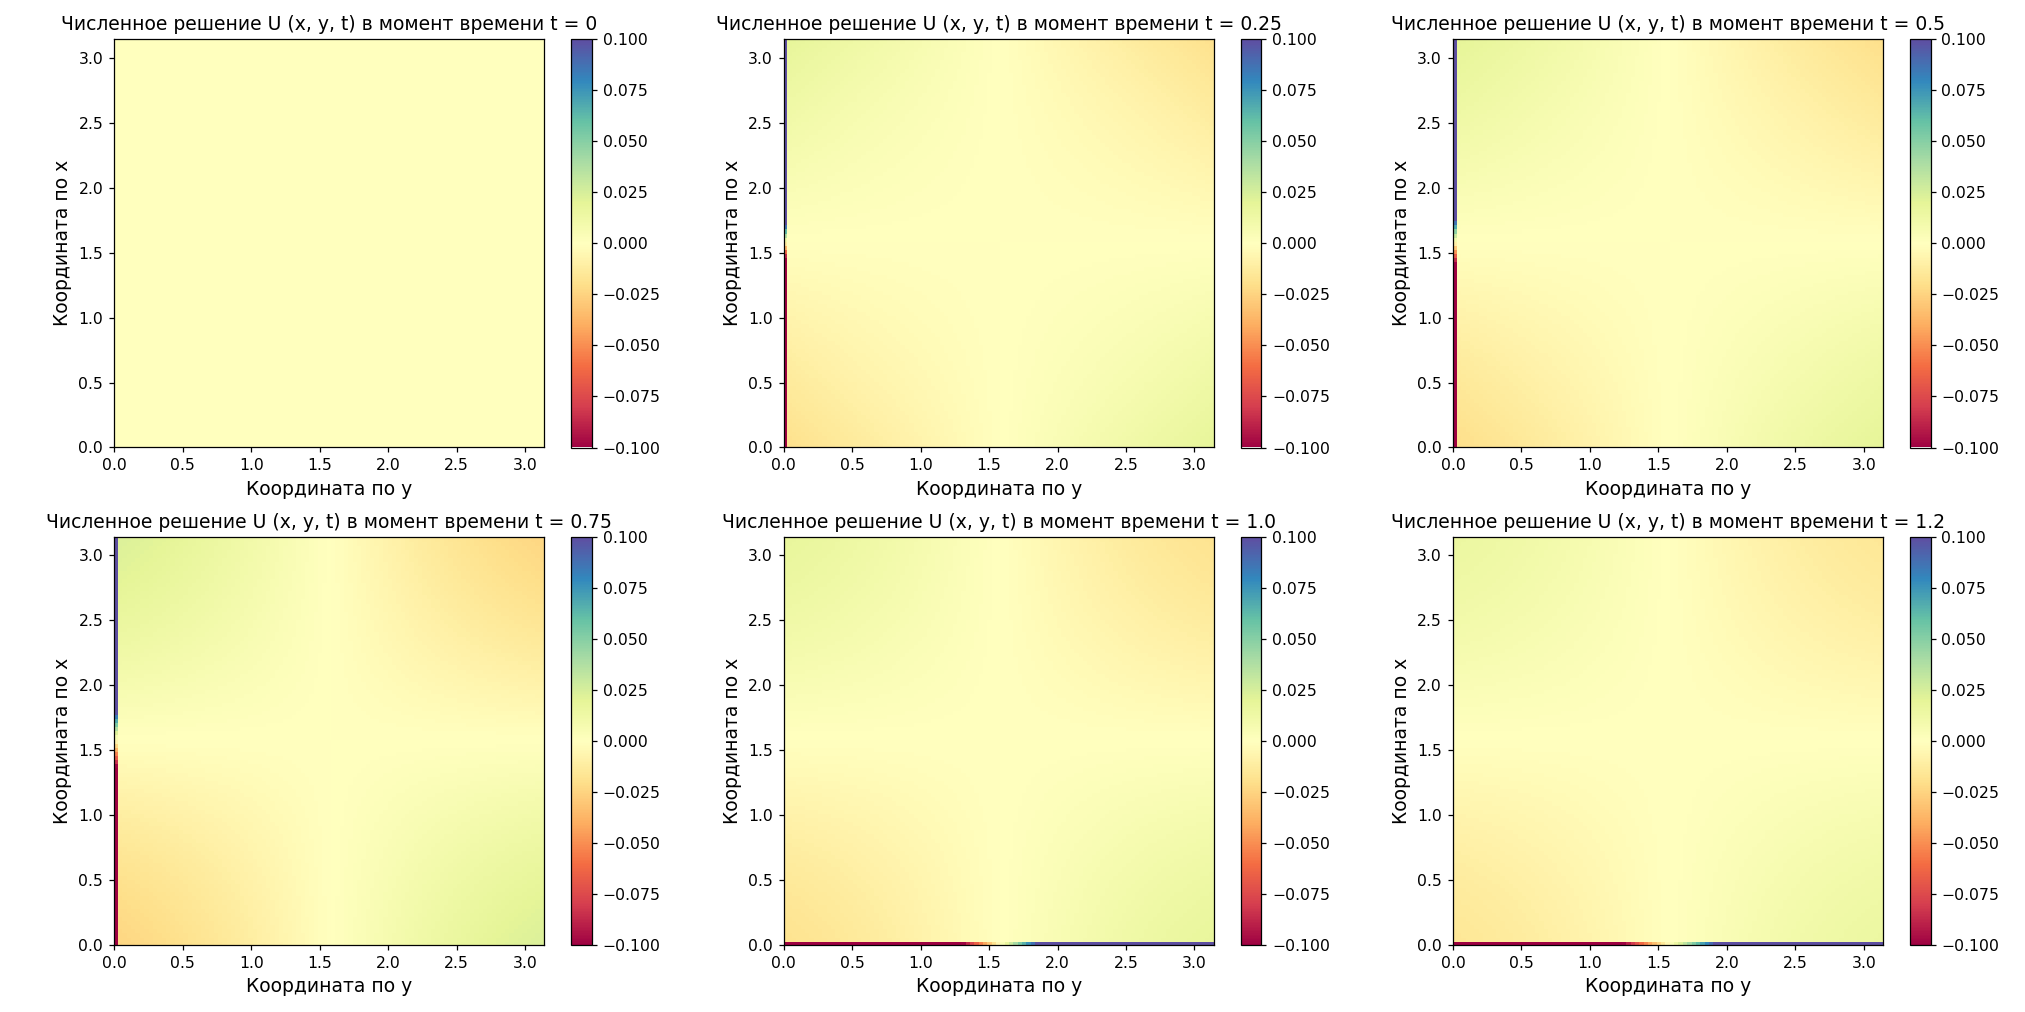

In [239]:
times=[0,0.25,0.5,0.75,1.,1.2]
fig = plt.figure(figsize = (18,9))
for i in range(len(times)):
    plt.subplot(2,3,i+1)
    r = int(times[i]/T2*(2*M))
    k = int(times[i]/T2*(M-1))
    plt.pcolormesh(y,x,u[:,:,r]-z[:,:,k],cmap='Spectral', vmin=-0.1,vmax=0.1)
    plt.colorbar()
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Численное решение U (x, y, t) в момент времени t = '+str(times[i]),fontsize=12)
plt.tight_layout()

Видно, что значение невязки порядка 10^-3 и принебрежимо мало по сравнению со значениями функций. Значительные различий есть только в краевых точках решения, что вполне обусловлено используемым нами методом. Как видно максимальное значение невязка приобретает при t=1,2. Построим 3D график

<IPython.core.display.Javascript object>


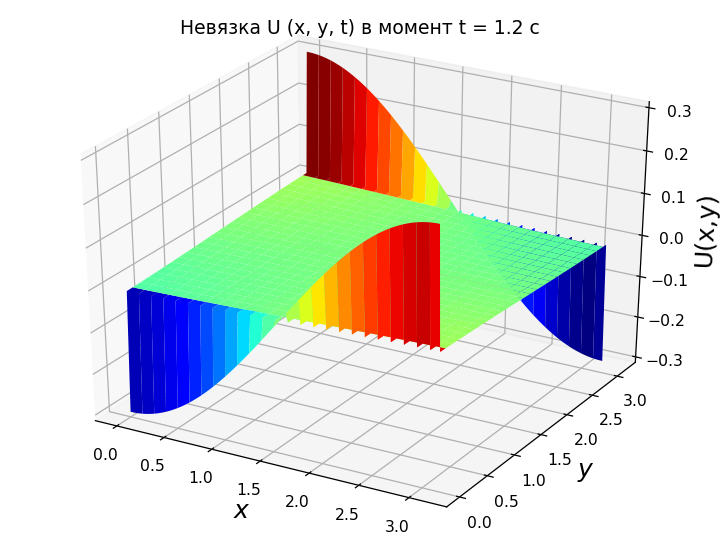

In [240]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)
t_const=99

axes.plot_surface(x1, y1, u[:,:,2 * t_const]- z[:,:,t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('Невязка U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()

Ну и наконец выведем 3D график нашего численного решения, для наглядности. Как видно численные методы дают весьма точное значение во всех точках за исключением граничных.
### Начальное значение

<IPython.core.display.Javascript object>


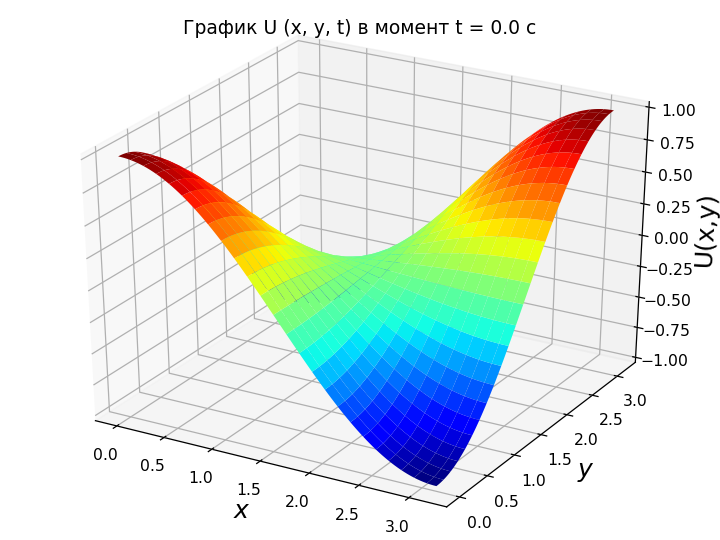

In [241]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)
t_const=0

axes.plot_surface(x1, y1, u[:,:,2 * t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('График U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()

### во время t=1,2 сек
Следует обратить внимание на то что масштаб по оси U(x,y) у этих графиков разный и это единственная причина, по которой они выглядят похоже. На самом деле мы здесь наблюдаем постепенное выравнивание колебаний. В рамках нашей задачи это может быть воспринято, как постепенное распределение тепла по поверхности и выравнивания температура

<IPython.core.display.Javascript object>


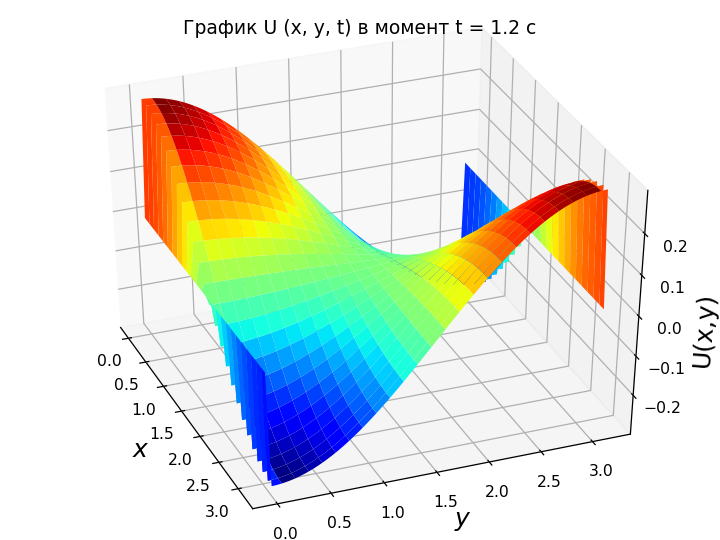

In [242]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)
t_const=99

axes.plot_surface(x1, y1, u[:,:,2 * t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('График U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()